# **Tasks**
**Use the data to complete the following tasks in medical_data_visualizer.py:**

1. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
2. Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
3. Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.
4. Clean the data. Filter out the following patient segments that represent incorrect data:
   - diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
   - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
   - height is more than the 97.5th percentile
   - weight is less than the 2.5th percentile
   - weight is more than the 97.5th percentile
5. Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

Any time a variable is set to None, make sure to set it to the correct code.

Unit tests are written for you under test_module.py.

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [332]:
import pandas as pd
import numpy as np
df=pd.read_csv('medical_examination.csv')
r=df.columns[:]
#new_order=df.columns[:].to_list()

# 1. Adding Overweight column

In [333]:

# Supongamos que ya tienes un DataFrame llamado df con las columnas 'weight' y 'height'.

# Calcula el BMI para todo el DataFrame directamente.
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

# Crea la columna 'overweight' utilizando una función lambda y apply.
df['overweight'] = df['bmi'].apply(lambda x: 1 if x >= 25 else 0)
df=df.drop(columns='bmi')
df.head(20)



,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,1


# 2.  Normalize the cholesterol and gluc data
Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.


In [334]:
df['cholesterol1'] = df['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
df=df.drop(columns='cholesterol')
df['gluc1'] = df['gluc'].apply(lambda x: 1 if x > 1 else 0)
df=df.drop(columns='gluc')
df.head(20)

,id,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,overweight,cholesterol1,gluc1
0,0,18393,2,168,62.0,110,80,0,0,1,0,0,0,0
1,1,20228,1,156,85.0,140,90,0,0,1,1,1,1,0
2,2,18857,1,165,64.0,130,70,0,0,0,1,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,1,1,1,0,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,0,0,0,0,1,1,1
6,9,22113,1,157,93.0,130,80,0,0,1,0,1,1,0
7,12,22584,2,178,95.0,130,90,0,0,1,1,1,1,1
8,13,17668,1,158,71.0,110,70,0,0,1,0,1,0,0
9,14,19834,1,164,68.0,110,60,0,0,0,0,1,0,0


In [335]:
df=df.rename(columns={'cholesterol1': 'cholesterol','gluc1':'gluc'})

 # 3. Seaborn plot
 Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.
 ### heres is how it should look like
<img src="./asse/Figure_1.png" width="1000" alt="Select Ollama models" />

In [336]:
df_melt=df.melt(id_vars=['cardio'],value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])
df_melt.sample(10)
#id_vars=['cardio']: Este argumento especifica las columnas que se mantendrán como identificadores (variables clave) en el DataFrame resultante. En este caso, solo se mantiene la columna 'cardio' como un identificador.
#value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']): Este argumento especifica las columnas que se "desenrollarán" o "derretirán" en una sola columna. Estas columnas se convertirán en valores dentro de esa columna. 
# En este caso, las columnas 'active', 'alco', 'cholesterol', 'gluc', 'overweight' y 'smoke' se desenrollarán en una sola columna.

,cardio,variable,value
170185,1,cholesterol,0
30698,0,active,1
230533,0,gluc,0
219113,1,gluc,0
302034,0,overweight,1
34605,0,active,1
314123,0,overweight,1
321316,0,overweight,1
126173,0,alco,0
24427,1,active,1


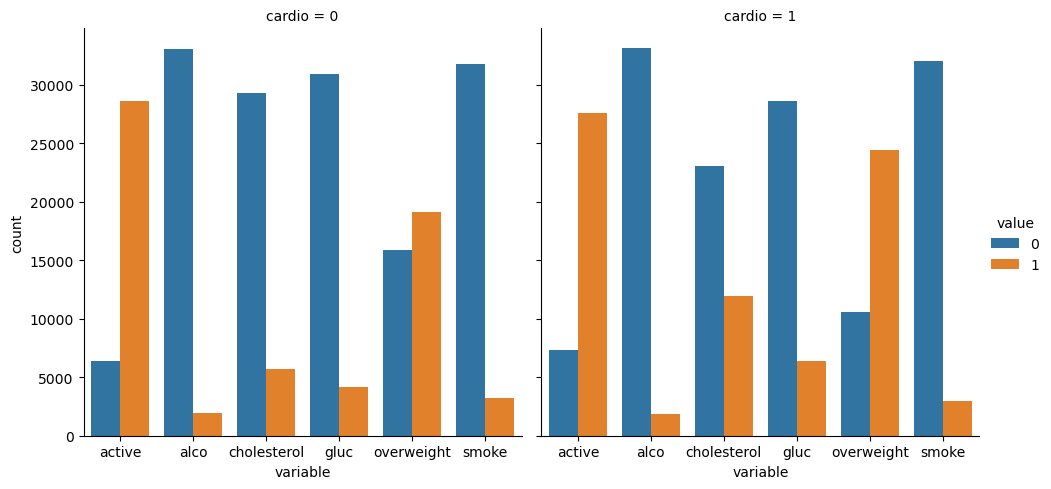

In [337]:
sns.catplot(x='variable',kind='count',data=df_melt,hue='value',col='cardio')
#sns.catplot(: Esto indica que se está utilizando la función catplot de la biblioteca Seaborn para crear un gráfico categórico.

#x='variable': Aquí se especifica que la variable que se representará en el eje x del gráfico es la columna 'variable' del DataFrame.
#kind='count': Este argumento indica que el tipo de gráfico que se creará es un gráfico de conteo. En otras palabras, el gráfico mostrará cuántas veces aparece cada valor en la columna 'variable'.
#data=df_melt: Aquí se especifica el DataFrame que se utilizará para crear el gráfico, en este caso, es el DataFrame df_melt.
#hue='value': Este argumento indica que se usará la columna 'value' para diferenciar los datos en el gráfico. En otras palabras, el gráfico mostrará diferentes colores o tonos para representar los diferentes valores en la columna 'value'.
#col='cardio': Este argumento indica que se creará una columna de gráficos separados para cada valor único en la columna 'cardio'. En este caso, habrá dos columnas de gráficos, una para 'cardio' igual a 0 y otra para 'cardio' igual a 1.

# 4. Clean the data
   - diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
   - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
   - height is more than the 97.5th percentile
   - weight is less than the 2.5th percentile
   - weight is more than the 97.5th percentile

In [338]:
df = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

In [339]:
#Todos JUNTOS
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,overweight,cholesterol,gluc
0,0,18393,2,168,62.0,110,80,0,0,1,0,0,0,0
1,1,20228,1,156,85.0,140,90,0,0,1,1,1,1,0
2,2,18857,1,165,64.0,130,70,0,0,0,1,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,1,1,1,0,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


# 4. Correlation Matrix
Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

### heres is how it should look like
<img src="./asse/Figure_2.png" width="1000" alt="Select Ollama models" />


Text(0.5, 1.0, 'Matriz de Correlacion')

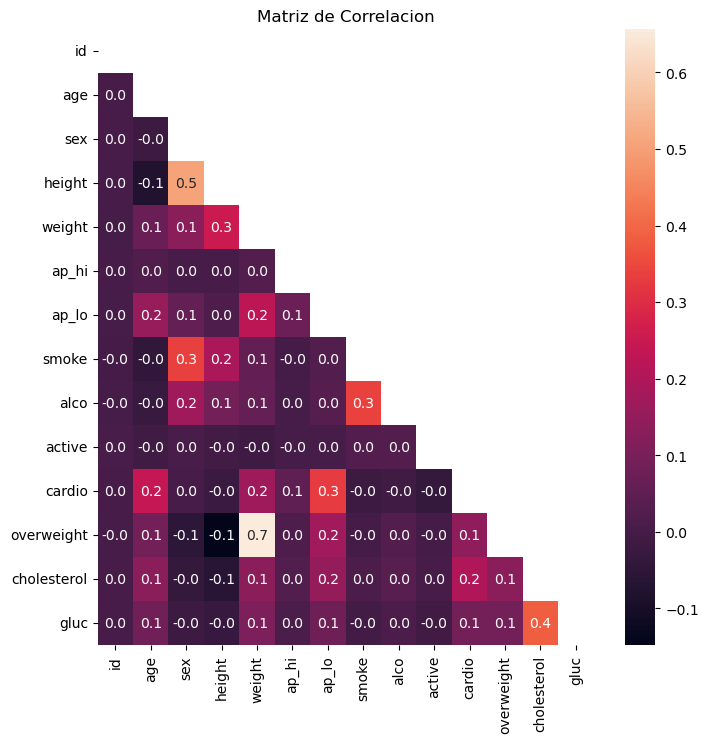

In [340]:
correlation_matrix=df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix,mask=mask,annot=True,fmt='.1f')
plt.title('Matriz de Correlacion')
#correlation_matrix contiene la matriz de correlación calculada a partir de tu DataFrame df.
#sns.heatmap() se utiliza para crear un gráfico de calor que representa visualmente la matriz de correlación. El argumento annot=True agrega valores numéricos a las celdas del mapa de calor. El argumento cmap se utiliza para especificar una paleta de colores, y fmt=".2f" se utiliza para formatear los valores con dos decimales.
#plt.title() se utiliza para agregar un título al gráfico de calor.

it looks different because the order of the columns is diferent, lets change that

In [341]:
df1=pd.read_csv('medical_examination.csv')
new_order=df1.columns[:].to_list()
new_order.append('overweight')
df = df.reindex(columns=new_order)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Matriz de Correlacion')

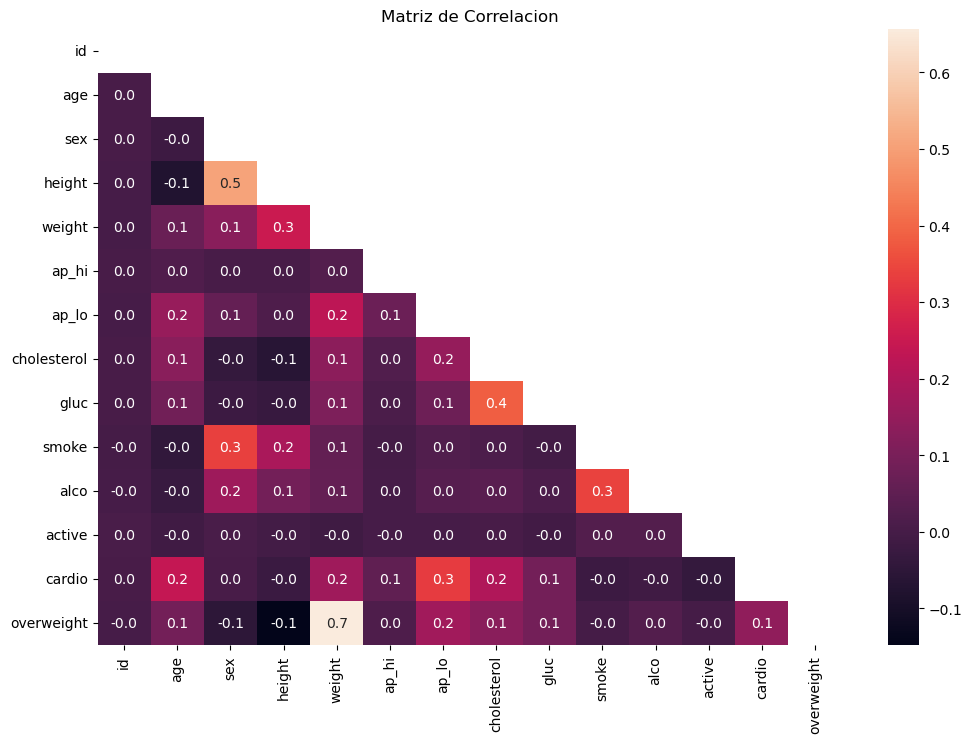

In [342]:
correlation_matrix=df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,mask=mask,annot=True,fmt='.1f')
plt.title('Matriz de Correlacion')